In [1]:
#pip install scikit-learn
#pip install seaborn
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
training_set = pd.read_csv('training_set.csv')
training_set['HomeResult'] = training_set['HomeResult'].map({'Won': 1, 'Lost': 0})
result = training_set["HomeResult"]
data = training_set.iloc[:, 7:]
data.head()
info = training_set.iloc[:, :7]
#info.head()
print(result)


0       1
1       0
2       1
3       0
4       0
       ..
2979    0
2980    0
2981    0
2982    0
2983    0
Name: HomeResult, Length: 2984, dtype: int64


In [2]:
testing_set = pd.read_csv('testing_set.csv')
testing_set['HomeResult'] = testing_set['HomeResult'].map({'Won': 1, 'Lost': 0})
result2 = testing_set["HomeResult"]

total_columns = len(testing_set.columns)

# Select columns from the 5th to the third-last
selected_columns = testing_set.columns[4:total_columns-3]

# Subset the DataFrame
data2 = testing_set[selected_columns]


selected_columns2 = list(testing_set.columns[:4]) + list(testing_set.columns[-3:])

# Subset the DataFrame
info2 = testing_set[selected_columns2]

print(result2)

#data.head()

#info2.head()

FileNotFoundError: [Errno 2] No such file or directory: 'testing_set.csv'

In [46]:
# Load dataset
#training_set = pd.read_csv('training_set.csv')
X_train = data
X_test = data2
y_train = result
y_test = result2

# Split dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Predict labels and probabilities
predicted_labels = svm_model.predict(X_test_scaled)
probabilities = svm_model.predict_proba(X_test_scaled)

# Create DataFrame
results_df = pd.DataFrame(probabilities, columns=[f'Prob_{label}' for label in svm_model.classes_])
results_df['Predicted Label'] = predicted_labels

# Display results
print(results_df.head(-20))

       Prob_0    Prob_1  Predicted Label
0    0.510329  0.489671                0
1    0.471149  0.528851                1
2    0.443140  0.556860                1
3    0.467938  0.532062                1
4    0.393711  0.606289                1
..        ...       ...              ...
182  0.476081  0.523919                1
183  0.527138  0.472862                0
184  0.445922  0.554078                1
185  0.415405  0.584595                1
186  0.465897  0.534103                1

[187 rows x 3 columns]


In [47]:
# Calculate Log Loss
logloss = log_loss(y_test, probabilities)
print(f"Log Loss: {logloss}")

Log Loss: 0.6759109638168338


In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities for the positive class
y_probs = probabilities[:, 1]  # assuming it's a binary classification (0 or 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: y should be a 1d array, got an array of shape (207, 2) instead.

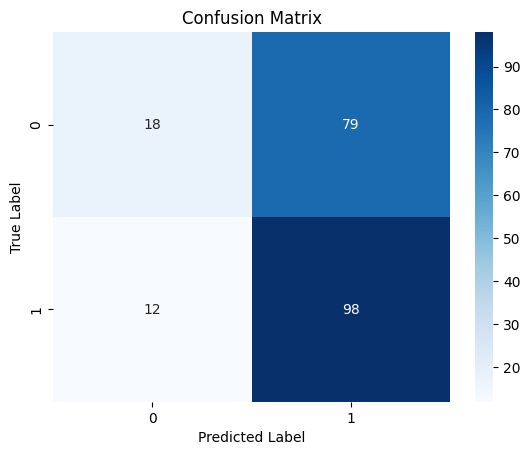

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels
#predicted_labels = svm_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Log Loss: 0.6759109638168338


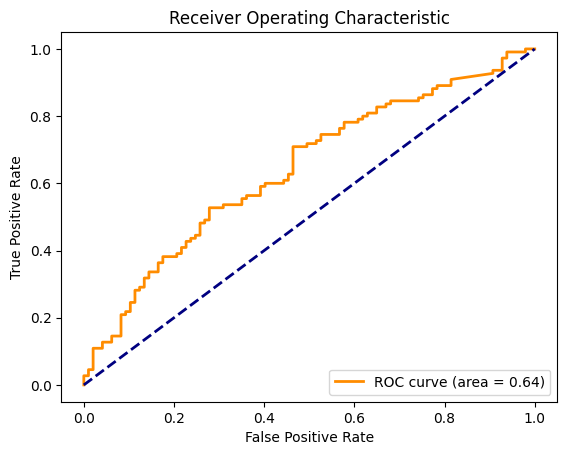

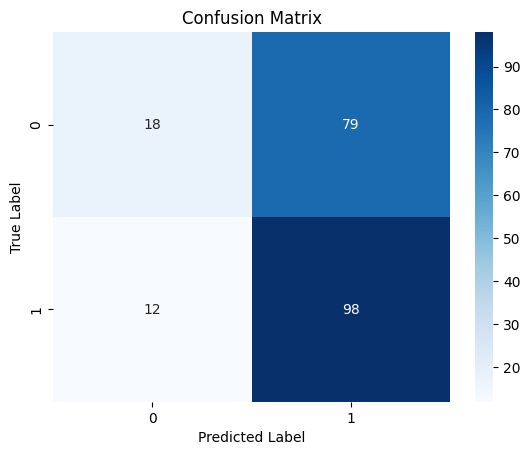

In [50]:
# Metrics
# Log Loss
logloss = log_loss(y_test, probabilities)
print(f"Log Loss: {logloss}")

# ROC Curve and AUC
y_probs = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
print(sum(y_test))
print(len(y_test))
print(sum(predicted_labels))
print(len(predicted_labels))

110
207
177
207
